In [1]:
from google.colab import drive
drive.mount('/content/driver', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/driver


Đoạn này nhận input từ các file trains rồi chuyển thành dữ liệu của xgboost

In [2]:
import xgboost as xgb
from glob import glob
import pandas as pd
from sklearn.metrics import mean_squared_error
import numpy as np
path_train = '/content/driver/My Drive/ktcnpm/data/k61/datacsv/train/*.csv'
files = glob(path_train)

x_input =[]
y_output=[]
print(files)
li = []
for filename in files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

dataFrame = pd.concat(li, axis=0, ignore_index=True)
X_train, y_train = dataFrame.iloc[:,[0, 2]],dataFrame.iloc[:,4]
# đọc data test
dtest = pd.read_csv("/content/driver/My Drive/ktcnpm/data/k61/datacsv/test/test.csv")
X_test, y_test = dtest.iloc[:,[0, 2]],dtest.iloc[:,4]

['/content/driver/My Drive/ktcnpm/data/k61/datacsv/train/C2015-12.csv', '/content/driver/My Drive/ktcnpm/data/k61/datacsv/train/C2015-13.csv', '/content/driver/My Drive/ktcnpm/data/k61/datacsv/train/C2015-14.csv', '/content/driver/My Drive/ktcnpm/data/k61/datacsv/train/2015-18.csv', '/content/driver/My Drive/ktcnpm/data/k61/datacsv/train/2015-17.csv', '/content/driver/My Drive/ktcnpm/data/k61/datacsv/train/2015-16.csv', '/content/driver/My Drive/ktcnpm/data/k61/datacsv/train/2015-21.csv', '/content/driver/My Drive/ktcnpm/data/k61/datacsv/train/2015-19.csv', '/content/driver/My Drive/ktcnpm/data/k61/datacsv/train/2015-20.csv', '/content/driver/My Drive/ktcnpm/data/k61/datacsv/train/Sheet12.csv', '/content/driver/My Drive/ktcnpm/data/k61/datacsv/train/2015-22.csv', '/content/driver/My Drive/ktcnpm/data/k61/datacsv/train/Sheet13.csv', '/content/driver/My Drive/ktcnpm/data/k61/datacsv/train/Sheet15.csv', '/content/driver/My Drive/ktcnpm/data/k61/datacsv/train/Sheet14.csv', '/content/driver

Block này dùng để tìm tham số phù hợp nhất cho model, rồi lấy tham số đó dùng cho block sau để train

In [ ]:
from sklearn.model_selection import GridSearchCV

# test tham số
# xg_reg = xgb.XGBRegressor(n_estimators = 1000, colsample_bytree = 0.3, gamma = 0.0, learning_rate= 0.05, max_depth= 4, min_child_weight= 7)
xg_reg = xgb.XGBRegressor()

parameters = {}
parameters['base_score'] = [0.5]
parameters['booster'] = ['gbtree']
parameters['colsample_bylevel'] = [1]
parameters['colsample_bynode'] = [1]
parameters['colsample_bytree'] = [1]
parameters['gamma'] = [0, 1]
parameters['importance_type'] = ['gain']
parameters['learning_rate'] = [0.1, 0.01, 0.05]
parameters['max_delta_step'] = [0]
parameters['max_depth'] = [3, 4, 5, 6, 8]
parameters['min_child_weight'] = [1]
parameters['missing'] = [None]
parameters['n_estimators'] = [100, 1000]
parameters['n_jobs'] = [1]
parameters['nthread'] = [None]
parameters['objective'] = ['reg:linear']
parameters['random_state'] = [0]
parameters['reg_alpha'] = [0]
parameters['reg_lambda'] = [1]
parameters['scale_pos_weight'] = [1]
parameters['seed'] = [None]
parameters['silent'] = [None]
parameters['subsample'] = [1, 0.8, 0.9]
parameters['verbosity'] = [1]



xgb_grid = GridSearchCV(xg_reg,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=True
       )
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)




Fitting 2 folds for each of 180 candidates, totalling 360 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    5.4s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:   13.3s


[05:48:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:9.68561	validation_1-rmse:2.01845
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 50 rounds.


[Parallel(n_jobs=5)]: Done 360 out of 360 | elapsed:   21.7s finished


[1]	validation_0-rmse:9.25241	validation_1-rmse:1.87603
[2]	validation_0-rmse:8.84132	validation_1-rmse:1.78651
[3]	validation_0-rmse:8.44997	validation_1-rmse:1.66719
[4]	validation_0-rmse:8.07763	validation_1-rmse:1.52503
[5]	validation_0-rmse:7.72706	validation_1-rmse:1.44597
[6]	validation_0-rmse:7.39651	validation_1-rmse:1.28948
[7]	validation_0-rmse:7.07774	validation_1-rmse:1.13329
[8]	validation_0-rmse:6.77586	validation_1-rmse:0.989649
[9]	validation_0-rmse:6.4939	validation_1-rmse:0.891792
[10]	validation_0-rmse:6.22459	validation_1-rmse:0.871051
[11]	validation_0-rmse:5.96315	validation_1-rmse:0.814003
[12]	validation_0-rmse:5.72153	validation_1-rmse:0.812166
[13]	validation_0-rmse:5.49235	validation_1-rmse:0.811541
[14]	validation_0-rmse:5.27041	validation_1-rmse:0.822712
[15]	validation_0-rmse:5.05763	validation_1-rmse:0.797601
[16]	validation_0-rmse:4.85788	validation_1-rmse:0.816085
[17]	validation_0-rmse:4.66595	validation_1-rmse:0.799187
[18]	validation_0-rmse:4.48249	

In [ ]:
xg_reg = xgb.XGBRegressor(gamma = 0,
learning_rate = 0.05,
n_estimators =100,
subsample =1)
xg_reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=True
       )

[05:49:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:9.68925	validation_1-rmse:1.99235
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 50 rounds.
[1]	validation_0-rmse:9.25924	validation_1-rmse:1.66497
[2]	validation_0-rmse:8.85188	validation_1-rmse:1.52775
[3]	validation_0-rmse:8.46566	validation_1-rmse:1.24351
[4]	validation_0-rmse:8.0999	validation_1-rmse:0.979074
[5]	validation_0-rmse:7.75653	validation_1-rmse:0.828558
[6]	validation_0-rmse:7.42721	validation_1-rmse:0.73164
[7]	validation_0-rmse:7.11254	validation_1-rmse:0.632913
[8]	validation_0-rmse:6.81609	validation_1-rmse:0.552944
[9]	validation_0-rmse:6.53393	validation_1-rmse:0.477089
[10]	validation_0-rmse:6.26797	validation_1-rmse:0.42883
[11]	validation_0-rmse:6.01455	validation_1-rmse:0.386725
[12]	validation_0-rmse:5.77571	vali

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:

preds = xgb_grid.predict(X_test)
def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_pred = np.array(y_pred)
    y_true = np.array(y_true)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mape = mean_absolute_percentage_error(y_test, preds)
print("Độ chính xác của dữ liệu K59 từ AT, XT dự đoán Total_AT: ")
print(100-mape)
print("Du doan la")
print(preds)
rmse = np.sqrt(mean_squared_error(y_test, preds)


Độ chính xác của dữ liệu K59 từ AT, XT dự đoán Total_AT: 
76.11407422622085
Du doan la
[1.7362912 3.490171  2.510066 ]


actually:  0    7.2
1    7.2
2    7.2
3    7.2
Name: TOTAL_AT, dtype: float64
model:  [8.763767  8.763767  3.8941522 4.3512163]


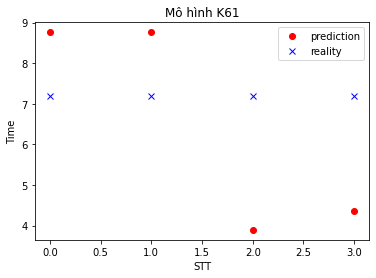

In [ ]:
import matplotlib.pyplot as plt

plt.plot(preds ,'o', color='r')
plt.plot(y_test ,'x', color='b')
plt.title("Mô hình K61")
plt.xlabel("STT")
plt.ylabel("Time")
# mplcursors.cursor(hover=True)
print("actually: ",y_test)
print("model: ", preds)
plt.legend(('prediction', 'reality'),loc='upper right')
# mplcursors.cursor(hover=True)

plt.show()